In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import matplotlib

In [6]:

font_path = 'C:\\Windows\\Fonts\\malgun.TTF'
font_jae = fm.FontProperties(fname=font_path).get_name()
matplotlib.rc('font',family=font_jae)

In [7]:
gym_df = pd.read_csv('./data/gym_churn_us.csv')
gym_df

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0


### 📌 **Feature 설명**

1. **gender**: 성별 (0 = 여성, 1 = 남성)
2. **Near_Location**: 헬스장이 집 또는 직장과 가까운지 여부 (1 = 가까움, 0 = 멀다)
3. **Partner**: 헬스장과 제휴된 기업 직원 여부 (1 = 제휴 기업 직원, 0 = 비제휴)
4. **Promo_friends**: 친구 추천 프로모션을 통해 가입했는지 여부 (1 = 예, 0 = 아니오)
5. **Phone**: 전화번호 제공 여부 (1 = 제공함, 0 = 제공 안 함)
6. **Contract_period**: 계약한 헬스장 이용 기간 (개월 단위, 1/6/12 등)
7. **Group_visits**: 단체 수업 참여 여부 (1 = 참여, 0 = 참여 안 함)
8. **Age**: 가입자의 나이
9. **Avg_additional_charges_total**: 총 추가 지출 비용 (추가 서비스나 상품 구매 금액)
10. **Month_to_end_contract**: 현재 계약이 종료되기까지 남은 개월 수
11. **Lifetime**: 헬스장 이용 개월 수 (가입 후 총 몇 개월 동안 이용했는지)
12. **Avg_class_frequency_total**: 전체 평균 수업 참여 빈도 (주 단위)
13. **Avg_class_frequency_current_month**: 최근 한 달간 평균 수업 참여 빈도 (주 단위)
14. **Churn**: 이탈 여부 (1 = 헬스장을 그만둔 회원, 0 = 유지한 회원)

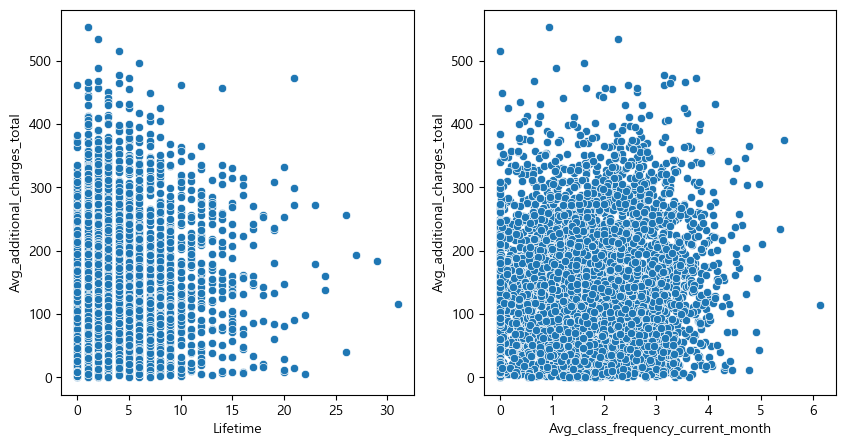

In [20]:
# 추가 지출과 이외 컬럼들의 상관관계 그려보기

fig, ax = plt.subplots(figsize=(10,5), ncols=2)

columns = ['Lifetime', 'Avg_class_frequency_current_month']

for i, col_name in enumerate(columns):
    col = i % 2
    ax_temp = ax[col]

    sns.scatterplot(data=gym_df, x=col_name, y='Avg_additional_charges_total', ax =ax_temp)


# 'Near_Location','Partner', 'Promo_friends'

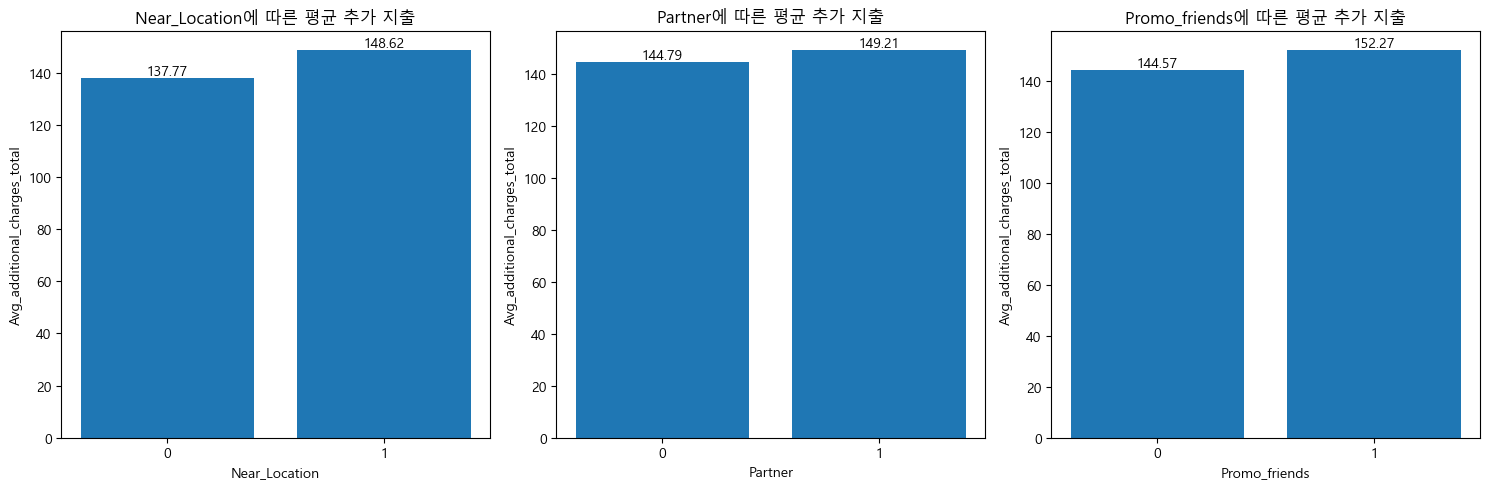

In [9]:
# 이진 분류로 된 컬럼: Near_Location','Partner', 'Promo_friends'
# bar chart 위에 지출 금액의 평균 띄우기!

values = ['Near_Location','Partner', 'Promo_friends']

fig, axs = plt.subplots(1, 3, figsize= (15,5))

for idx, value in enumerate(values):
    y = gym_df.groupby(value)['Avg_additional_charges_total'].mean()

    bars = axs[idx].bar(y.index.astype(str), y.values)
    axs[idx].set_title(f'{value}에 따른 평균 추가 지출')
    axs[idx].set_xlabel(value)
    axs[idx].set_ylabel('Avg_additional_charges_total')

    # 각 bar 위에 평균값을 표시
    for bar in bars:
        yval = bar.get_height()  # 바의 높이 (평균값)
        axs[idx].text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2),
                      ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()


# mean_values = gym_df.groupby('Near_Location')['Avg_additional_charges_total'].mean()
# mean_values


In [10]:
gym_df['Avg_class_frequency_current_month'].values
gym_df['Avg_additional_charges_total']

0        14.227470
1       113.202938
2       129.448479
3        62.669863
4       198.362265
           ...    
3995      2.406023
3996     68.883764
3997     78.250542
3998     61.912657
3999    178.861814
Name: Avg_additional_charges_total, Length: 4000, dtype: float64

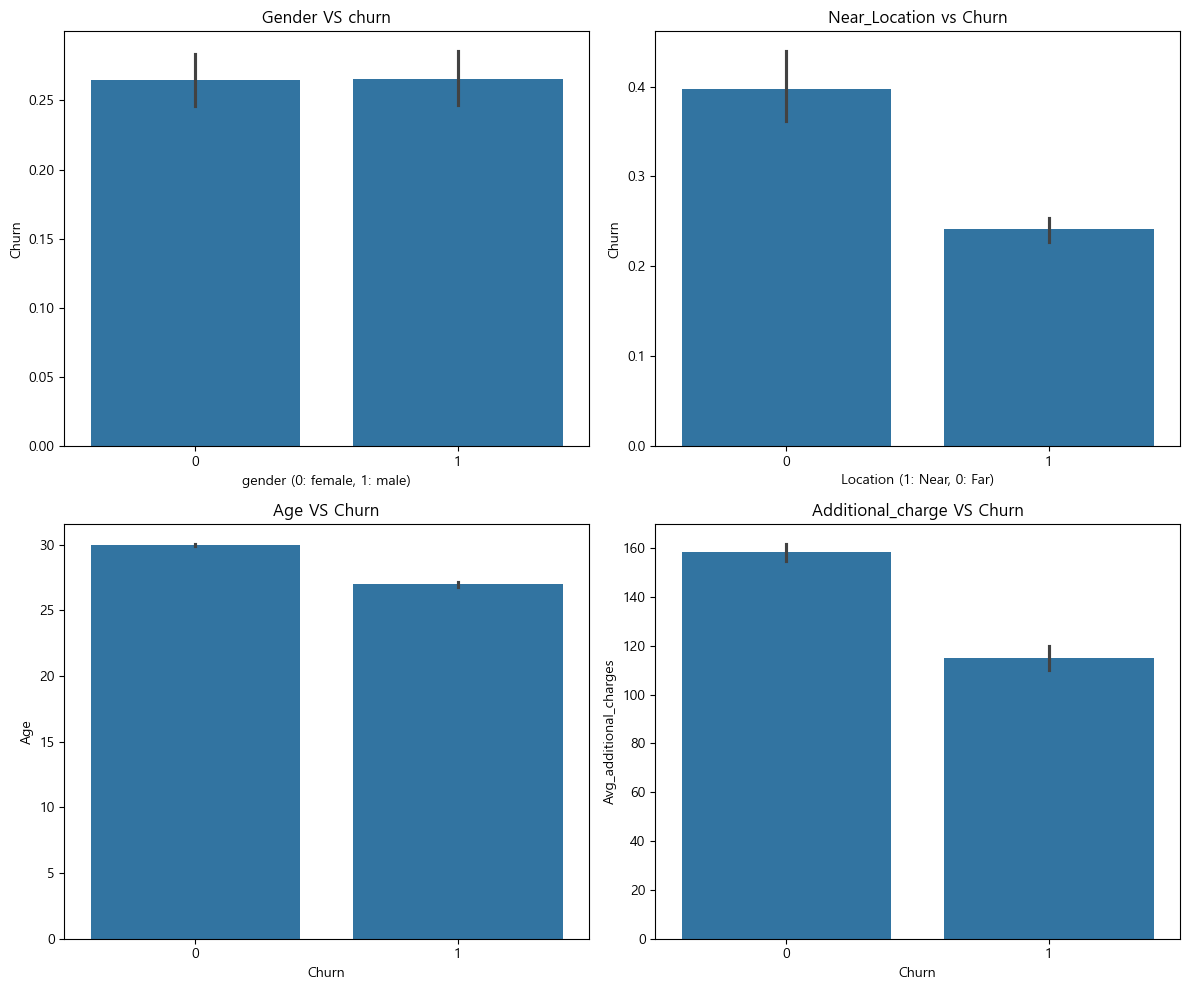

In [22]:
# 4개 한 번에 보이도록!
# 그래프 크기 설정
plt.figure(figsize=(12, 10))

# 첫 번째 그래프: 성별에 따른 이탈률
plt.subplot(2, 2, 1)  # 2x2 배열에서 첫 번째 위치
sns.barplot(x="gender", y="Churn", data=gym_df)
plt.title('Gender VS churn')
plt.xlabel('gender (0: female, 1: male)')
plt.ylabel('Churn')

# 두 번째 그래프: 헬스장 위치에 따른 이탈률
plt.subplot(2, 2, 2)  # 2x2 배열에서 두 번째 위치
sns.barplot(x="Near_Location", y="Churn", data=gym_df)
plt.title('Near_Location vs Churn')
plt.xlabel('Location (1: Near, 0: Far)')
plt.ylabel('Churn')

# 세 번째 그래프: 이탈 여부에 따른 나이 평균 비교
plt.subplot(2, 2, 3)  # 2x2 배열에서 세 번째 위치
sns.barplot(x="Churn", y="Age", data=gym_df)
plt.title('Age VS Churn')
plt.xlabel('Churn')
plt.ylabel('Age')

# 네 번째 그래프: 이탈 여부에 따른 평균 추가 지출 비용 비교
plt.subplot(2, 2, 4)  # 2x2 배열에서 네 번째 위치
sns.barplot(x="Churn", y="Avg_additional_charges_total", data=gym_df)
plt.title('Additional_charge VS Churn')
plt.xlabel('Churn')
plt.ylabel('Avg_additional_charges')

# 그래프들 간 간격을 조정
plt.tight_layout()

# 그래프 출력
plt.show()


c:\Users\Playdata\anaconda3\envs\pystudy_env\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.draw()
c:\Users\Playdata\anaconda3\envs\pystudy_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


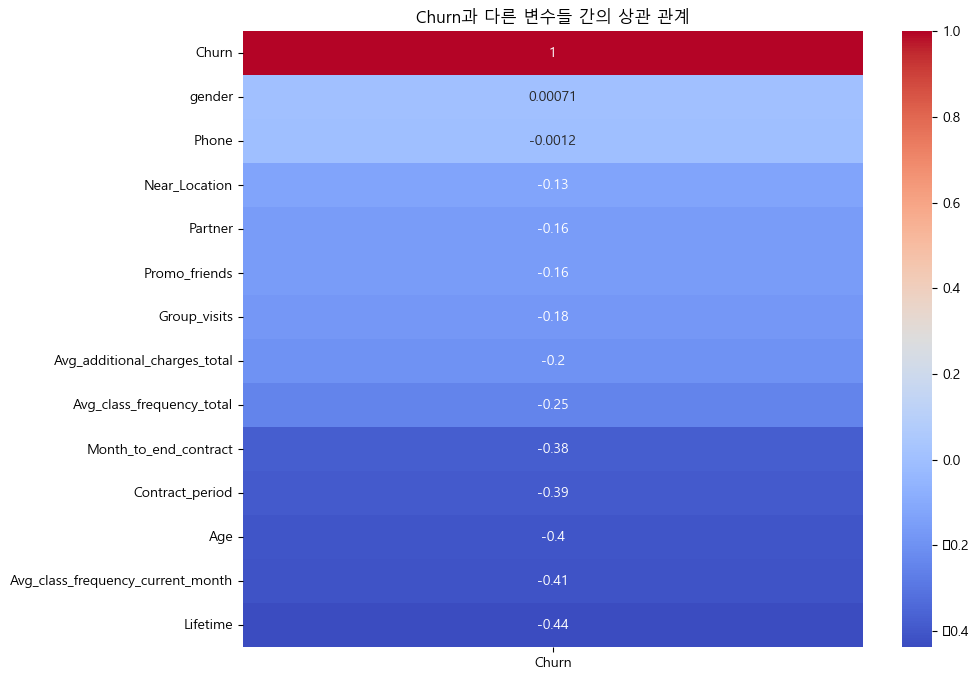

In [12]:
# 상관 행렬 계산
correlation_matrix = gym_df.corr()

# Churn 1이 이탈을 한다라는 값을 나타내므로, 반비례 관계가 오히려 긍정적으로 해석됨

# Churn(이탈 여부)와 다른 변수들 간의 상관 관계 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix[['Churn']].sort_values(by='Churn', ascending=False), annot=True, cmap='coolwarm')
plt.title('Churn과 다른 변수들 간의 상관 관계')
plt.show()